In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#!pip show pillow

In [3]:
#!pip install pillow
#!pip install nvidia-ml-py3

In [20]:
from fastai.vision import *
from fastai.metrics import error_rate
import fastai
import mlcrate as mlc
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from torchvision import transforms, utils

# Applying Grayscale Transform:

In [31]:
data = ImageDataBunch.from_folder("./data_v4/Anime_Recogntn_Images/" , size = 450, valid_pct= 0.15, seed = 42, bs = 32)

In [32]:
for itemList in ["train_dl", "valid_dl", "fix_dl", "test_dl"]:
    itemList = getattr(data, itemList)
    if itemList: itemList.x.convert_mode = "L"

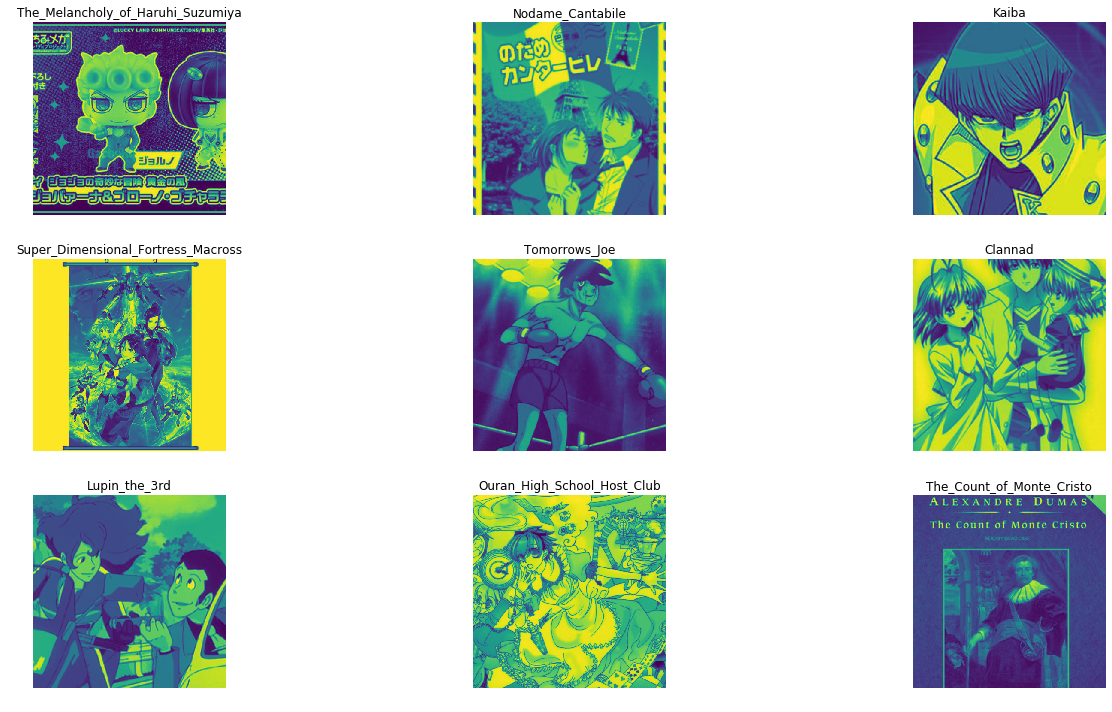

In [33]:
data.show_batch(rows=3, figsize=(20,10))

In [34]:
data.one_batch()[0].size()

torch.Size([32, 1, 450, 450])

# Grayscale function:

In [19]:
def grayscale_trials(transforms):
    data = ImageDataBunch.from_folder("./data_v4/Anime_Recogntn_Images/" , size = 450, valid_pct= 0.15, seed = 42, bs = 32, ds_tfms = transforms)
    #print(data)
    path = Path('~./Anime_Project/data_v4/Anime_Recogntn_Images')
    
    for itemList in ["train_dl", "valid_dl", "fix_dl", "test_dl"]:
    itemList = getattr(data, itemList)
    if itemList: itemList.x.convert_mode = "L"
        
    classes = data.classes
    for c in classes:
        #print(c)
        verify_images(path/c, delete=True, size = 500)
    
    learn = cnn_learner(data, models.resnet50, metrics = error_rate)
    
    learn.fit_one_cycle(8, max_lr=slice(1e-3,1e-2))
    print("Train Cycle 1")
    learn.recorder.plot_losses()

In [14]:
time = mlc.time.Timer()
grayscale_trials(tfms_vanilla)
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 400.00 MiB (GPU 0; 15.90 GiB total capacity; 2.02 GiB already allocated; 59.88 MiB free; 22.83 MiB cached)

In [ ]:
transform_trials(tfms_1)

In [ ]:
transform_trials(tfms_2)

In [ ]:
transform_trials(tfms_3)

In [ ]:
transform_trials(tfms_4)

In [ ]:
transform_trials(tfms_5)

In [ ]:
transform_trials(tfms_6)